# Homework 3

*Name: Yuxuan Han*

*Net ID: yxh204*

---

### Reading Data

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
if os.getenv ('PUI2016') is None:
    print("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print("Must set env variable PUI2016")

In [3]:
def getCitiBikeCSV(datestring):
    
    print ("Downloading", datestring)
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))

            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")

            if '2014' in datestring or '2013' in datestring:
                    os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                              "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))

            print("File in place, you can continue.")
            
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
                print("WARNING!!! something is wrong: the file is not there!")
    else:
        print("File in place, you can continue.")

In [4]:
datestring = "201507"
getCitiBikeCSV(datestring)

File in place, you can continue.


---

### Hypothesis

We wish to explore whether if CitiBike ridership increases during the rush hours of New York City. We define the rush hours of NYC to be the hours between 7:00-9:00AM and 16:00-21:00PM. Given the data we have, we formulate our question as follows. Does average CitiBike ridership increase during the rush hours of NYC (as we defined above) significantly at a level of $\alpha=0.05$ ?

Let $\mu_R$ be the population mean ridership during rush hours and $\mu_{R^C}$ be the population mean ridership during non-rush hours, our hypotheses are as follows.

$H_0: \mu_R - \mu_{R^C} \leq 0$

$H_a: \mu_R - \mu_{R^C} > 0$

---

### Data Wrangling

In [5]:
data = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv').dropna()

In [6]:
data.shape

(905311, 15)

In [7]:
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,732,7/1/2015 00:00:03,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970.0,1
1,322,7/1/2015 00:00:06,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984.0,1
2,790,7/1/2015 00:00:17,7/1/2015 00:13:28,447,8 Ave & W 52 St,40.763707,-73.985162,358,Christopher St & Greenwich St,40.732916,-74.007114,18801,Subscriber,1992.0,1
3,1228,7/1/2015 00:00:23,7/1/2015 00:20:51,490,8 Ave & W 33 St,40.751551,-73.993934,250,Lafayette St & Jersey St,40.724561,-73.995653,19137,Subscriber,1990.0,1
4,1383,7/1/2015 00:00:44,7/1/2015 00:23:48,327,Vesey Pl & River Terrace,40.715338,-74.016584,72,W 52 St & 11 Ave,40.767272,-73.993929,15808,Subscriber,1988.0,1


In [8]:
data = data.iloc[:,1:2]

In [9]:
data.starttime = pd.to_datetime(data.starttime, format = "%m/%d/%Y %H:%M:%S")
data.set_index("starttime", inplace = True)
data["Hours"] = data.index.hour
data["Hours"] = data["Hours"].astype(int)

In [10]:
rush_hr = [7,8,9,16,17,18,19,20,21]
is_rushhr = lambda x: True if x in rush_hr else False

In [11]:
by_hours = pd.DataFrame({"Count": data.groupby("Hours").apply(len)})
by_hours.reset_index(level = 0, inplace = True)
by_hours["IsRushHr"] = by_hours["Hours"].apply(is_rushhr)
by_hours["IsRushHr"] = by_hours["IsRushHr"].astype("category")
by_hours.head()

,Hours,Count,IsRushHr
0,0,9259,False
1,1,5042,False
2,2,2882,False
3,3,1755,False
4,4,1691,False


---

### Visualizations

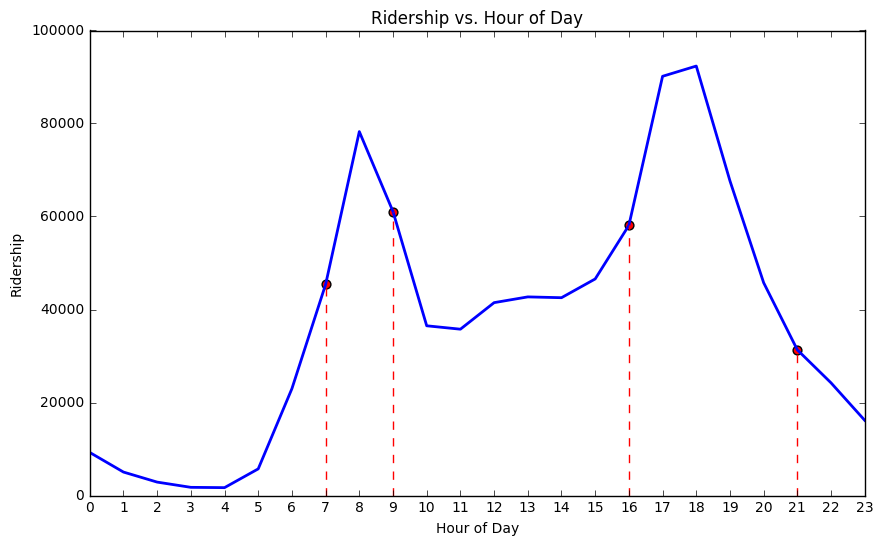

In [41]:
plt.figure(figsize = (10, 6))
plt.xlim(0,23); plt.ylim(0, 100000)
plt.xticks(np.arange(0,24))

plt.plot(by_hours.Hours, by_hours.Count, lw=2)
plt.ylabel("Ridership"); plt.xlabel("Hour of Day")
plt.title("Ridership vs. Hour of Day")

for i in [7,9,16,21]:
    plt.plot((i, i), (0, by_hours.Count[i]), 'r--')
    plt.scatter(i, by_hours.Count[i], c='r', s=40)
    
plt.show()

<center>*Figure 1: Ridership vs. Hour of Day*</center>

---